<a href="https://colab.research.google.com/github/SJDL123/DataScience/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis(EDA) - Terrorism

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Load: Load data into a dataframe

In [3]:
df1 = pd.read_csv("terrorism.csv")
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970000e+11,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df1.shape

(9998, 135)

In [5]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df1.columns.nunique()

135

In [7]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
df2=df1[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
df2.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7998 non-null   float64
 1   Month        7998 non-null   float64
 2   Day          7998 non-null   float64
 3   Country      7998 non-null   object 
 4   state        7966 non-null   object 
 5   Region       7998 non-null   object 
 6   city         7998 non-null   object 
 7   latitude     7778 non-null   float64
 8   longitude    7778 non-null   float64
 9   AttackType   7998 non-null   object 
 10  Killed       7080 non-null   float64
 11  Wounded      5835 non-null   float64
 12  Target       7931 non-null   object 
 13  Summary      825 non-null    object 
 14  Group        7998 non-null   object 
 15  Target_type  7998 non-null   object 
 16  Weapon_type  7998 non-null   object 
 17  Motive       589 non-null    object 
dtypes: float64(7), object(11)
memory usage: 1.4+ MB


In [11]:
df2.shape

(9998, 18)

#  Data Cleaning: Handle NA values

In [12]:
df2=df2.drop(['latitude','longitude','Summary'],axis='columns')
df2.head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [13]:
df2.isna().sum()

Year           2000
Month          2000
Day            2000
Country        2000
state          2032
Region         2000
city           2000
AttackType     2000
Killed         2918
Wounded        4163
Target         2067
Group          2000
Target_type    2000
Weapon_type    2000
Motive         9409
dtype: int64

In [14]:
df2['state']=df2['state'].fillna('Others')

In [15]:
df2['city']=df2['city'].replace('Unknown','others')

In [16]:
df3=df2.dropna()
df3.isna().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

## Data Exploration

In [17]:
#year-wise terrorist attacks from 1970 to 2017
df3['Year'].value_counts().sort_index()

1970.0    219
1971.0    111
1972.0     40
1973.0     25
1974.0     40
1975.0     26
1976.0     30
1977.0     18
1978.0     41
1979.0      2
Name: Year, dtype: int64

In [18]:
#Top 10 affected countries
df3['Country'].value_counts().head(10)

United States    544
Netherlands        3
Poland             1
Italy              1
India              1
Sri Lanka          1
Guyana             1
Name: Country, dtype: int64

In [19]:
#most terrorist attacked state
df3['state'].mode()

0    California
Name: state, dtype: object

In [20]:
#most terrorist attacked region
df3['Region'].mode()

0    North America
Name: Region, dtype: object

In [21]:
#most terrorist attacked city
df3['city'].mode()

0    New York City
Name: city, dtype: object

In [22]:
#Top 10 attacking modes
df3['AttackType'].value_counts().head(10)

Bombing/Explosion                      261
Facility/Infrastructure Attack         190
Armed Assault                           61
Assassination                           19
Hostage Taking (Barricade Incident)     10
Hostage Taking (Kidnapping)              7
Hijacking                                2
Unarmed Assault                          2
Name: AttackType, dtype: int64

In [23]:
#most common target of terrorists
df3['Target'].mode()

0    department store
Name: Target, dtype: object

In [24]:
#most commonly used weapon
df3['Weapon_type'].mode()

0    Explosives
Name: Weapon_type, dtype: object

In [25]:
df3['AttackType'].unique()

array(['Armed Assault', 'Facility/Infrastructure Attack',
       'Bombing/Explosion', 'Assassination', 'Hijacking',
       'Unarmed Assault', 'Hostage Taking (Kidnapping)',
       'Hostage Taking (Barricade Incident)'], dtype=object)

# Data Visualization

In [26]:
df3.describe()

,Year,Month,Day,Killed,Wounded
count,552.000000,552.000000,552.000000,552.000000,552.000000
mean,1972.188406,5.661232,14.572464,0.181159,0.396739
std,2.657184,3.344592,8.762764,0.740192,2.277529
min,1970.000000,1.000000,0.000000,0.000000,0.000000
25%,1970.000000,3.000000,7.000000,0.000000,0.000000
50%,1971.000000,5.000000,14.000000,0.000000,0.000000
75%,1974.000000,8.000000,22.000000,0.000000,0.000000
max,1979.000000,12.000000,31.000000,8.000000,36.000000


<Axes: >

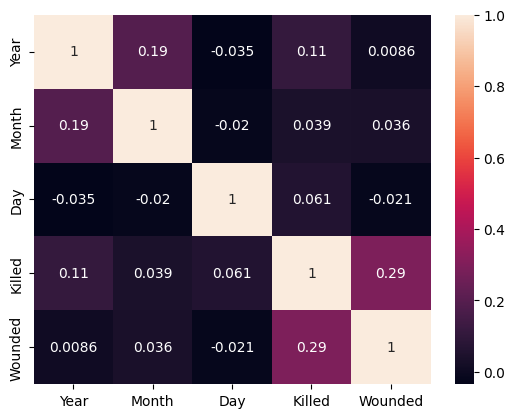

In [27]:
import seaborn as sn
sn.heatmap(df3.corr(),annot=True)

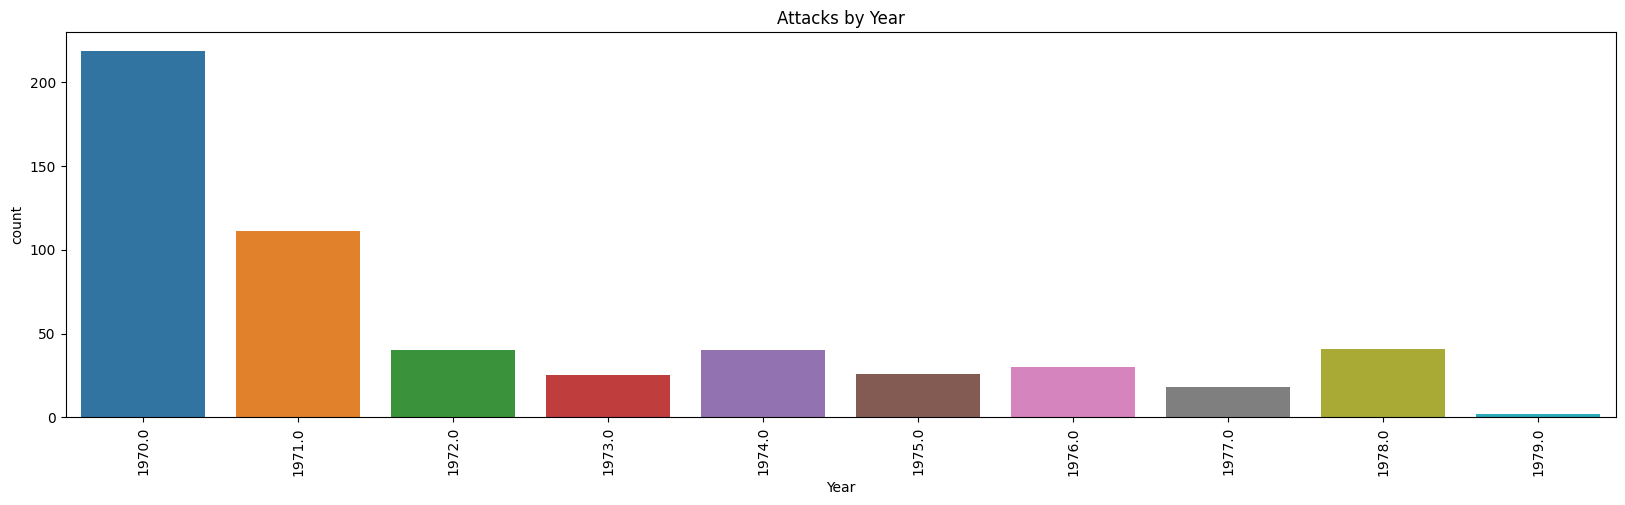

In [28]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sn.countplot(x=df3.Year);

In [29]:
#top 5 destructive attacks
df3.sort_values(by="Killed",ascending=False).head()

,Year,Month,Day,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
4698,1977.0,5.0,23.0,Netherlands,Drenthe,Western Europe,Tynaarlo,Armed Assault,8.0,0.0,Train,South Moluccans,Unknown,Firearms,Obtain the freedom for 21 comrades in Dutch ja...
1652,1973.0,1.0,7.0,United States,Louisiana,North America,New Orleans,Armed Assault,8.0,20.0,Indiscriminate members of the New Orleans Poli...,Republic of New Afrika,Police,Firearms,Essex claimed that he was avenging the death o...
1665,1973.0,1.0,18.0,United States,District of Columbia,North America,Washington,Armed Assault,7.0,2.0,Khalifa Hamaas Abdul Khaalis and his family,Black Muslims,Religious Figures/Institutions,Firearms,It is suspected that the motive for this attac...
6806,1978.0,11.0,18.0,Guyana,Barima-Waini,South America,Port Kaitmu,Assassination,5.0,0.0,Leo Ryan,People's Temple,Government (General),Firearms,Jones’ murder conspiracy was carried out in or...
2711,1975.0,1.0,2.0,India,Bihar,South Asia,Samastipur,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,Ananda Marga,Government (General),Explosives,Unknown


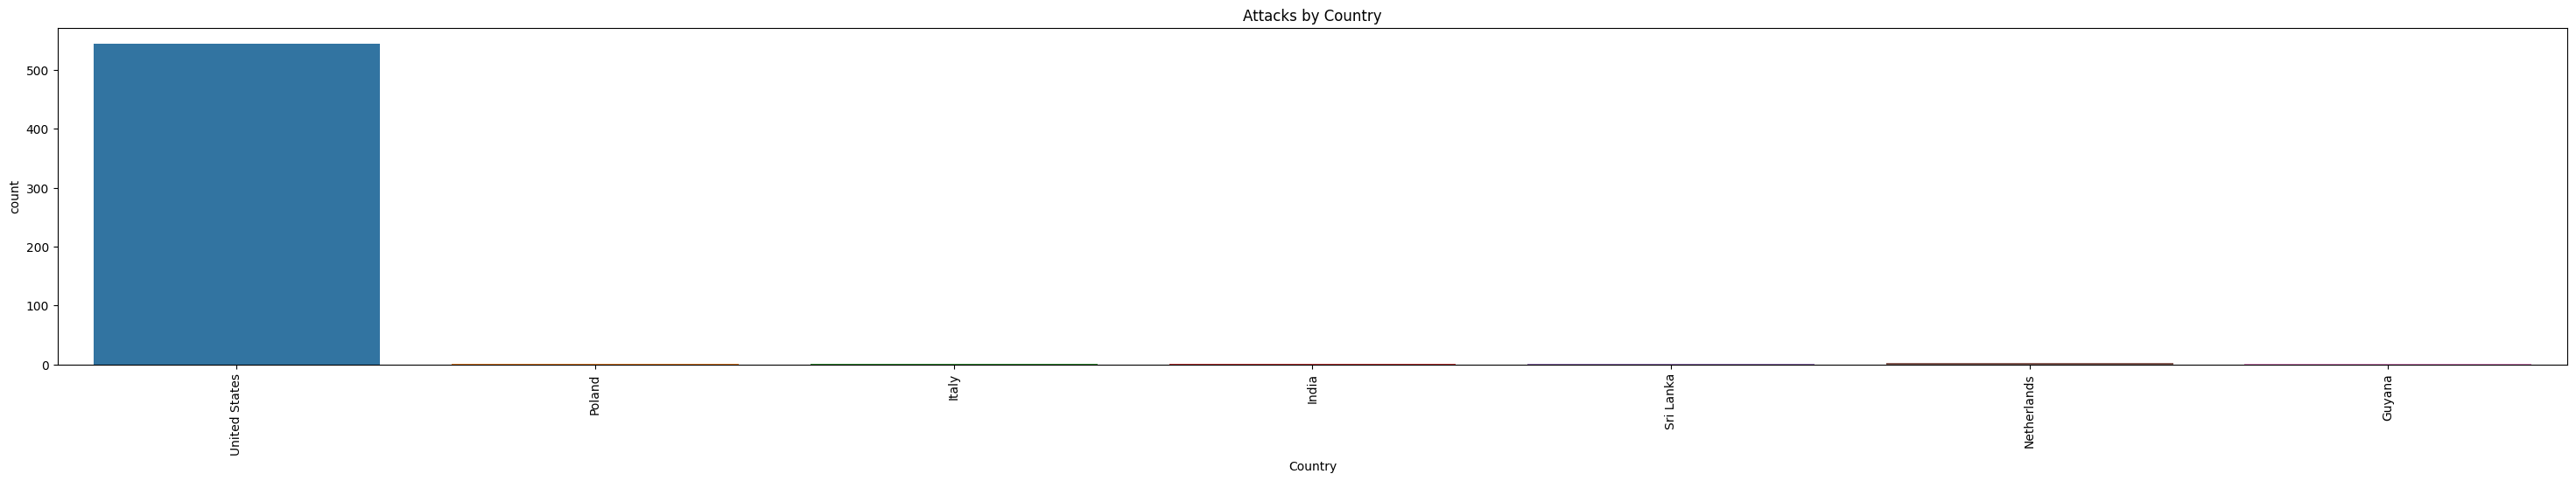

In [30]:
plt.figure(figsize=(37,5))
plt.title('Attacks by Country')
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
sn.countplot(x=df3.Country);

<Axes: xlabel='Country', ylabel='Killed'>

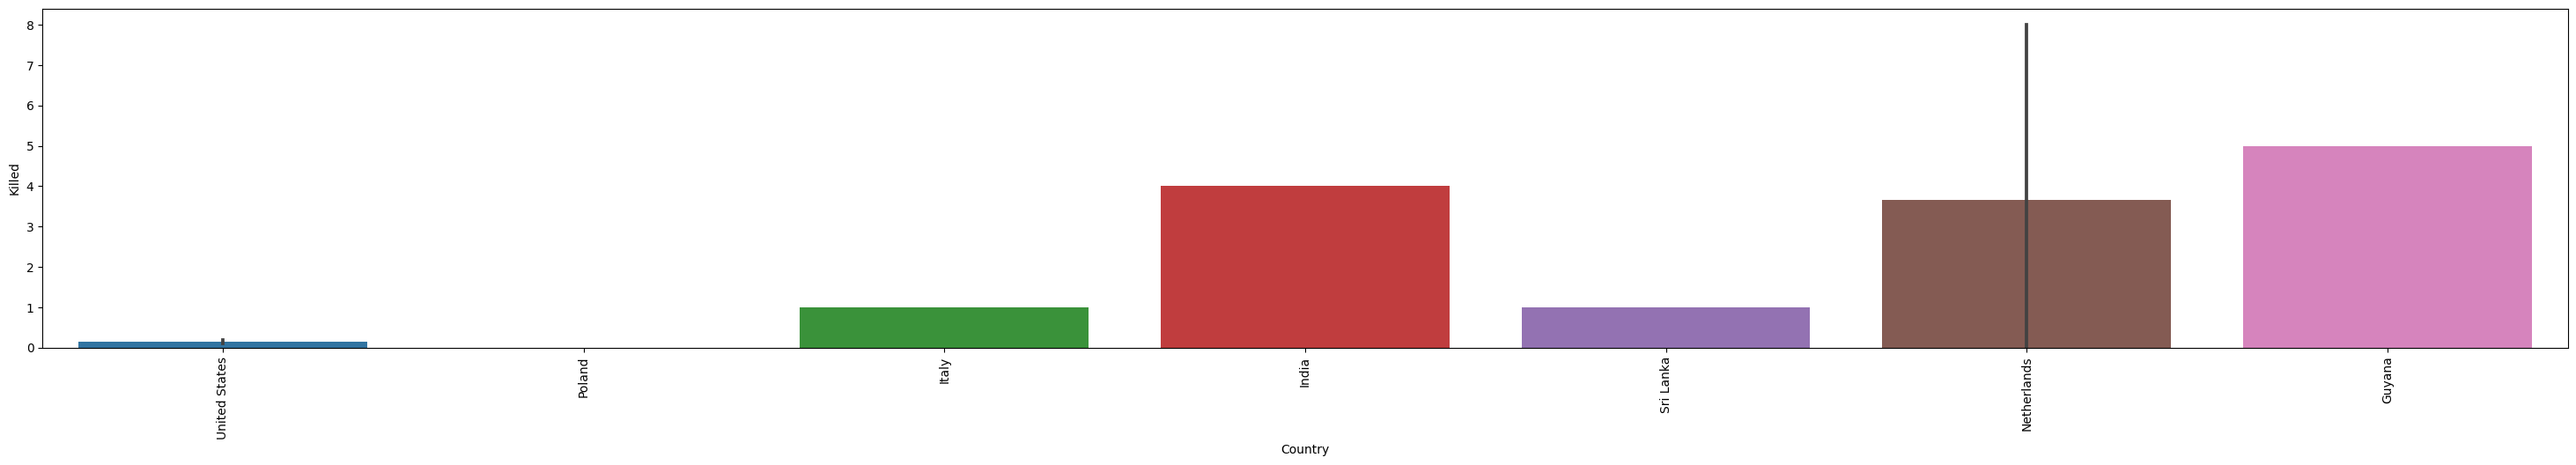

In [31]:
plt.figure(figsize=(37,5))
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
sn.barplot(x=df3.Country,y=df3.Killed)

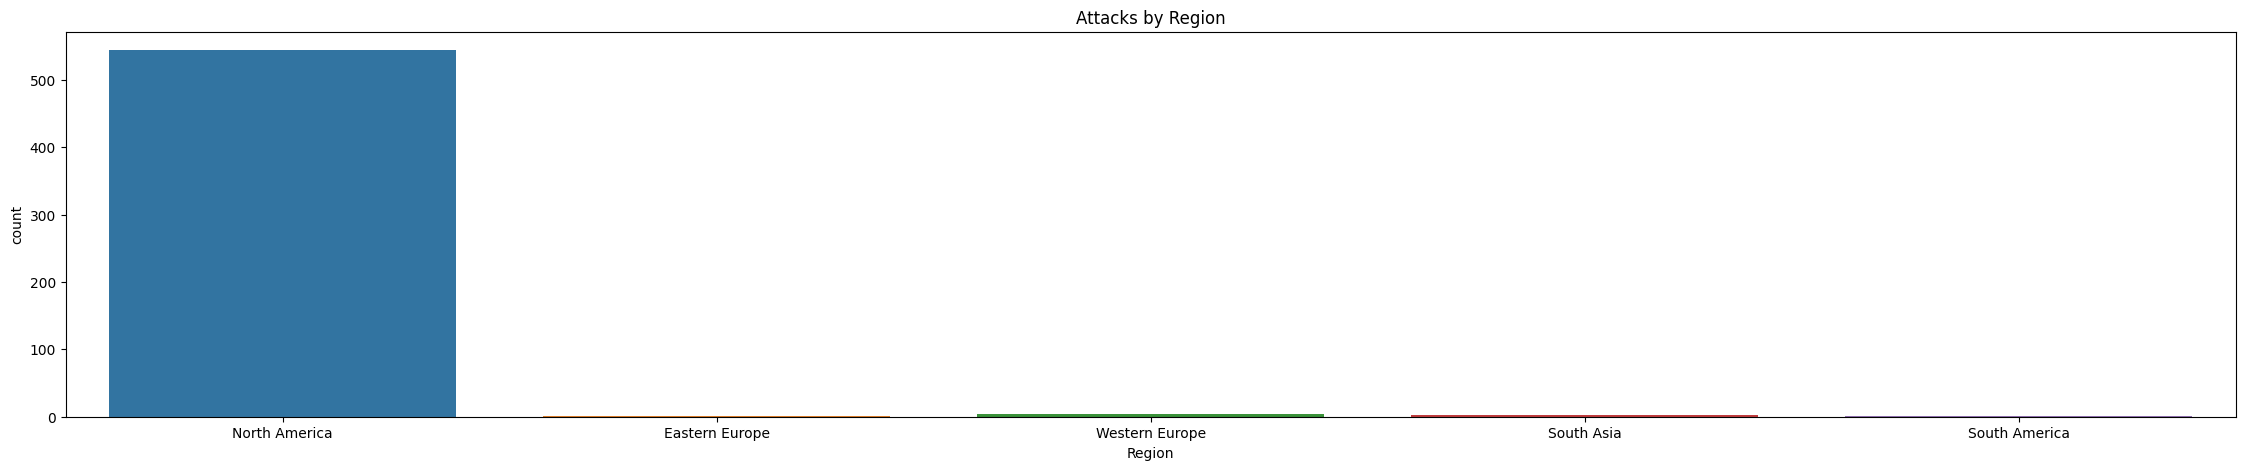

In [32]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sn.countplot(x=df3.Region);

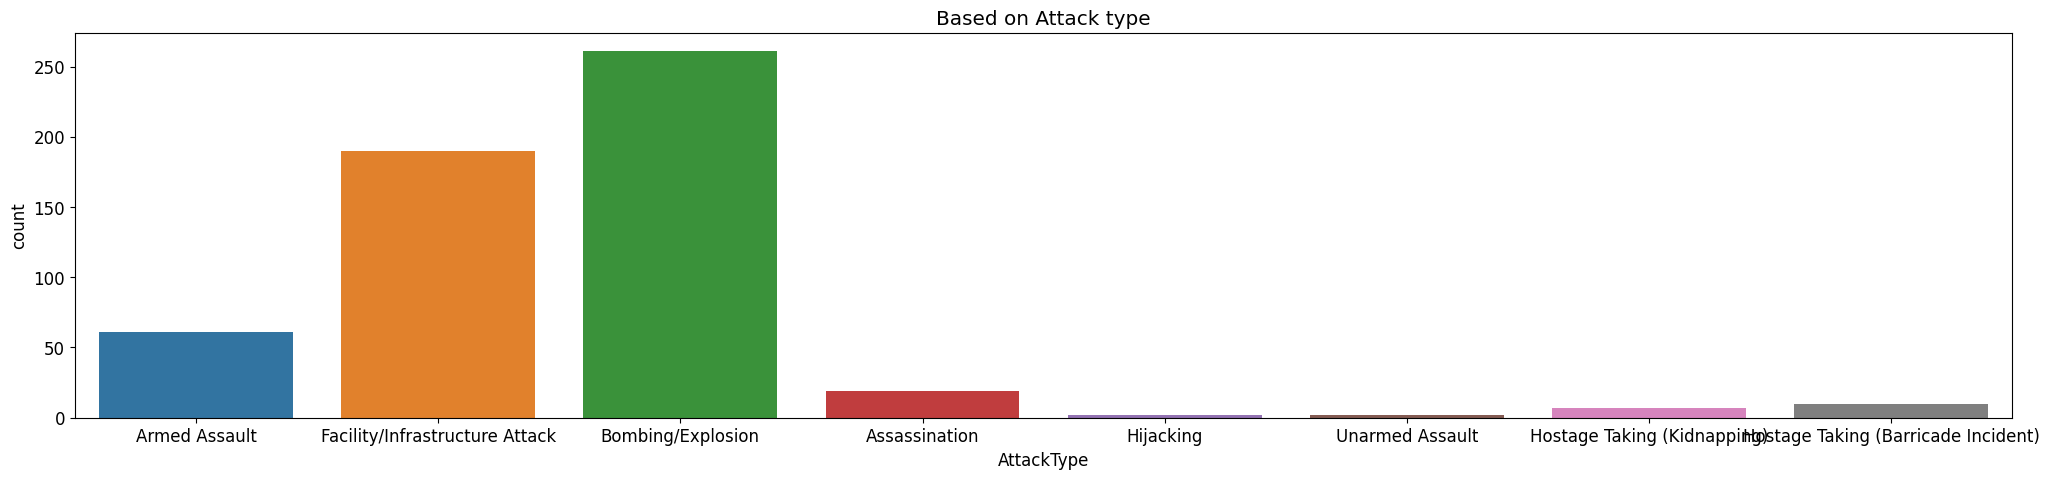

In [33]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sn.countplot(x=df3.AttackType);

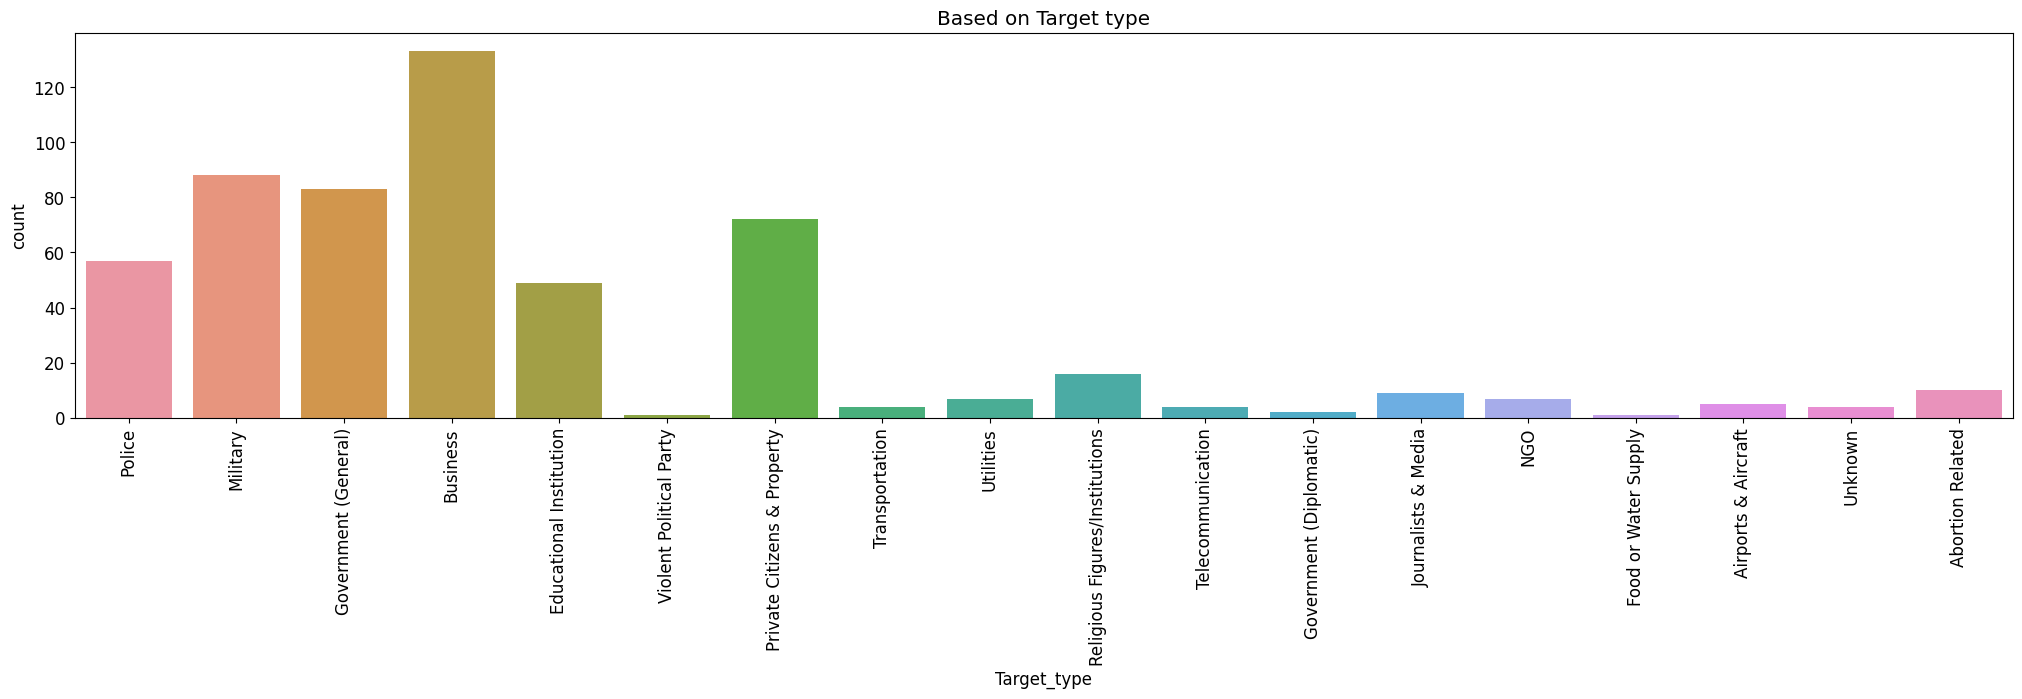

In [34]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sn.countplot(x=df3.Target_type);

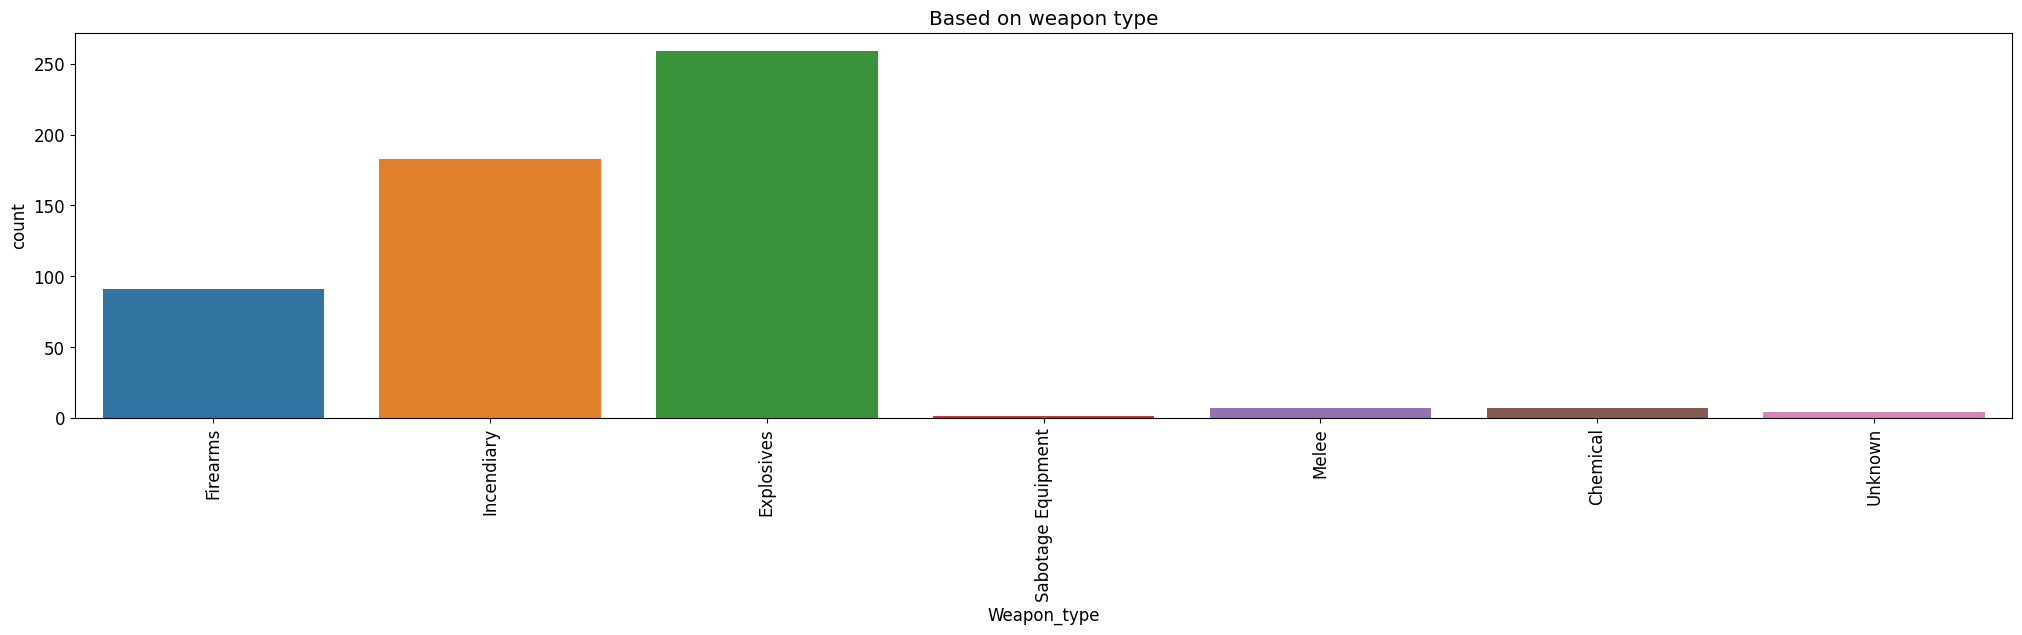

In [35]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Based on weapon type')
sn.countplot(x=df3.Weapon_type);

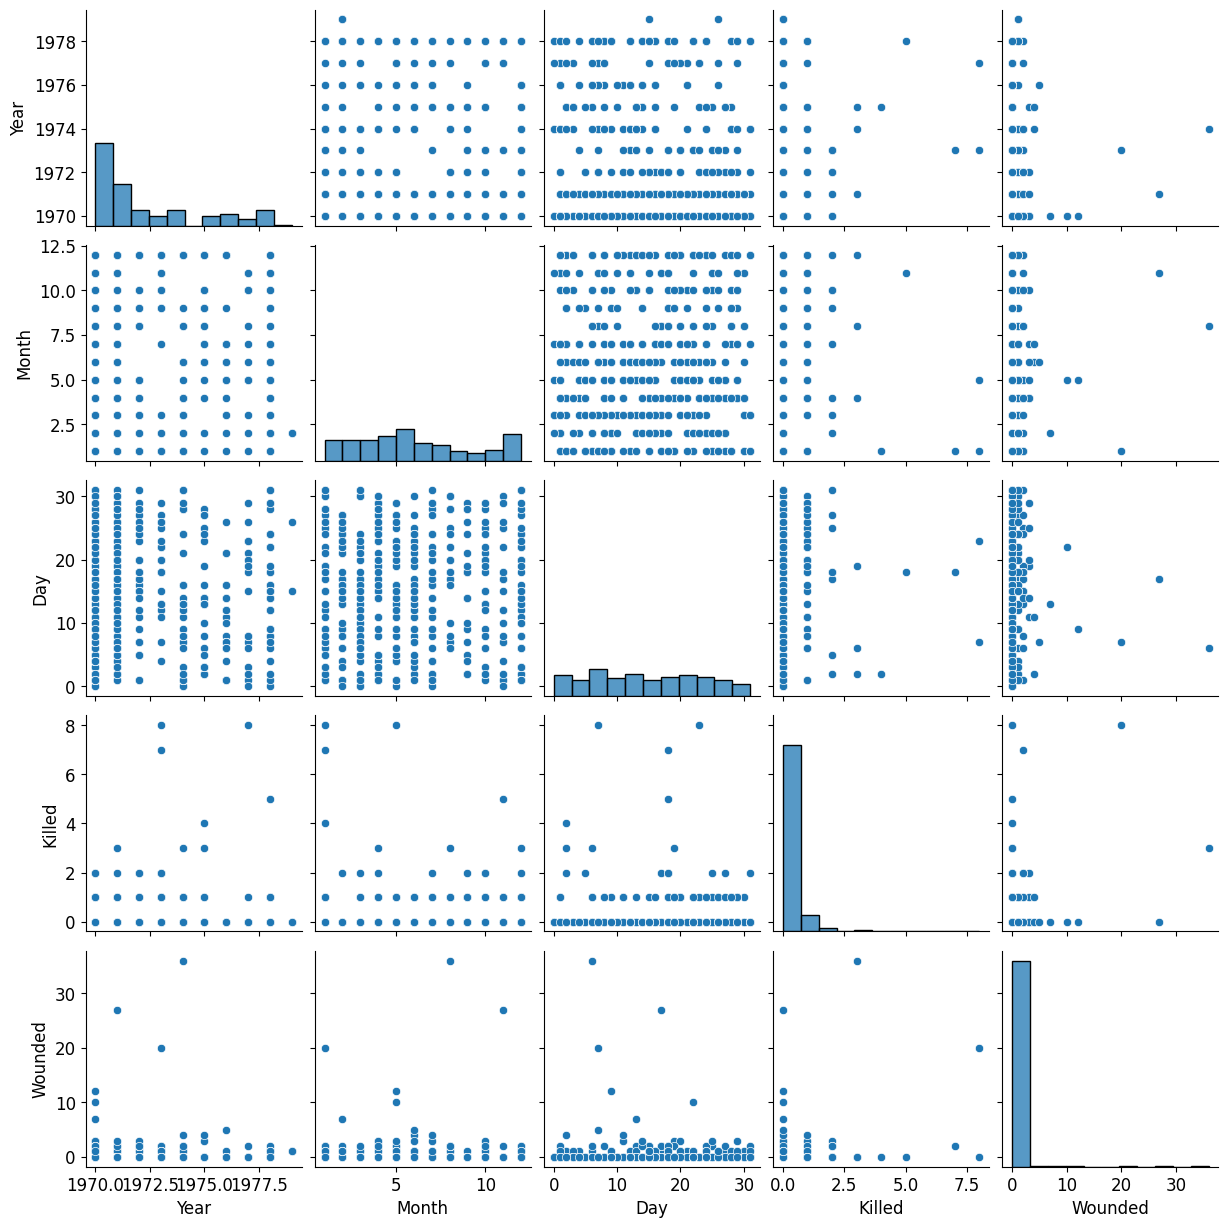

In [36]:
sn.pairplot(df3);

In [37]:
d=df3[['Year','Killed']]
d=d.groupby(by='Year').agg(np.sum)
d

,Killed
Year,
1970.0,16.0
1971.0,9.0
1972.0,6.0
1973.0,31.0
1974.0,11.0
1975.0,9.0
1976.0,0.0
1977.0,9.0
1978.0,9.0


In [38]:
print("Most Attacked")
print("Country : ",df3['Country'].value_counts().idxmax())
print('Region :',df3['Region'].value_counts().idxmax())
print('Year : ',df3['Year'].value_counts().idxmax())
print('Month : ',df3['Month'].value_counts().idxmax())
print('Type: ',df3['AttackType'].value_counts().idxmax())

Most Attacked
Country :  United States
Region : North America
Year :  1970.0
Month :  5.0
Type:  Bombing/Explosion
